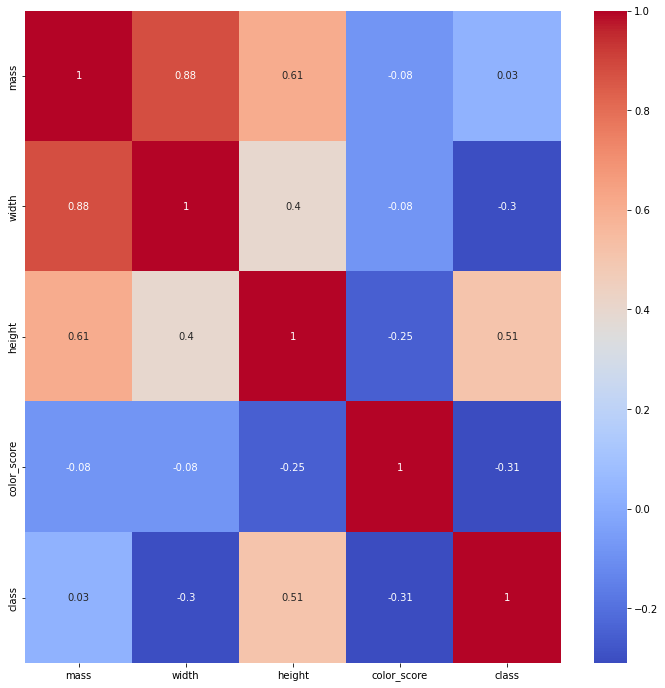

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('fruit.csv').iloc[:,1:]
data.dropna()

corr_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Data preprocesing
data['mass_width'] = data['mass'] + data['width']

# Extract the features and target variable
X = data[['mass_width', 'height', 'color_score']]
y = data['class']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a pipeline with a StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test, zero_division=1)

print(mat_clf)
print(report_clf)

ypred_testP = pipeline.predict_proba(X_test)
try:
  auc = roc_auc_score(y_test, ypred_testP, multi_class='ovr')
  print(auc)
except:
  print('error')
  pass

[[4 0 2 0]
 [0 0 4 0]
 [0 0 5 0]
 [0 0 8 1]]
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         6
           2       1.00      0.00      0.00         4
           3       0.26      1.00      0.42         5
           4       1.00      0.11      0.20         9

    accuracy                           0.42        24
   macro avg       0.82      0.44      0.35        24
weighted avg       0.85      0.42      0.36        24

0.9631335282651072


In [28]:
from joblib import dump
dump(pipeline, 'model.pkl')

['model.pkl']